In [1]:
import datetime as dt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from hawkes import dataLoader, fit

In [2]:
l = dataLoader.Loader("AAPL.OQ", dt.date(2019,1,7), dt.date(2019,1,7), nlevels = 2)

In [3]:
data = l.loadBinned(binLength = 60, filterTop = True)

# limitOrders = d.loc[d.Type == 1]
# limitOrders['count'] = 1
# bins = np.arange(limitOrders.Time.min() - 1e-3, limitOrders.Time.max(), 1)
# labels = np.arange(0, len(bins)-1, 1)
# limitOrders['second'] = pd.cut(limitOrders['Time'], bins=bins, labels=labels)
# binLimitOrders = limitOrders.groupby("second").sum()[['count','Size']]
# binLimitOrders.reset_index(inplace=True)

In [4]:
data['2019-01-07']['limit_bid']

,binIndex,count,Size
0,0,766,112395
1,1,772,103904
2,2,655,141402
3,3,619,106186
4,4,427,81395
...,...,...,...
384,384,561,175384
385,385,998,215535
386,386,639,159378
387,387,529,117019


In [23]:
dims = list(data['2019-01-07'].keys())

# Fit

## 60 second bin size, lookback history (p) = 10 min = 10, fit window size (n) = 6.5 hr = 389  

In [51]:
cls = fit.ConditionalLeastSquares(data, 10, 1, T = 389)
thetas = cls.fit()

In [52]:
thetas.keys()

dict_keys(['2019-01-07_0'])

In [53]:
# thetas shape - (d, dp+1) 
# thetas[-1] -> exo
# thetas[0, ..., d] = H^(n - 1) ...

limit_bid
exogenous intensity : 33.152734513363754
limit_bid -> limit_bid


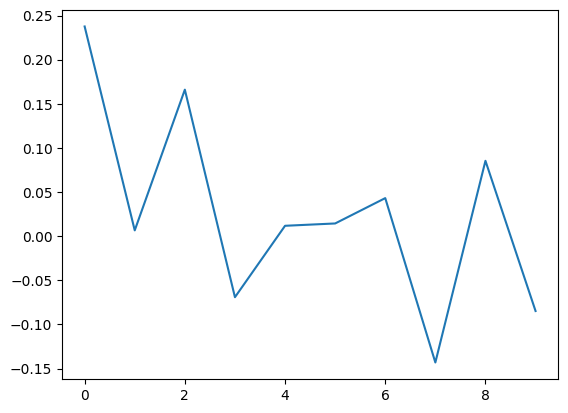

limit_ask -> limit_bid


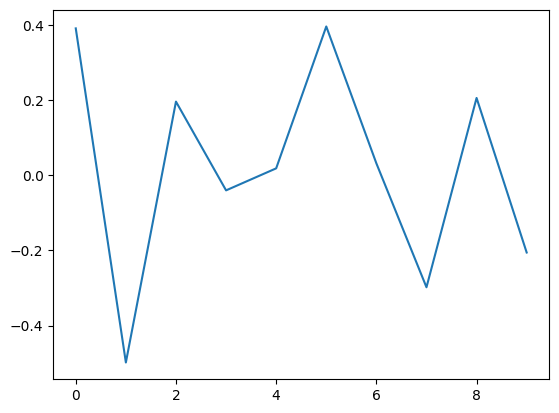

cancel_bid -> limit_bid


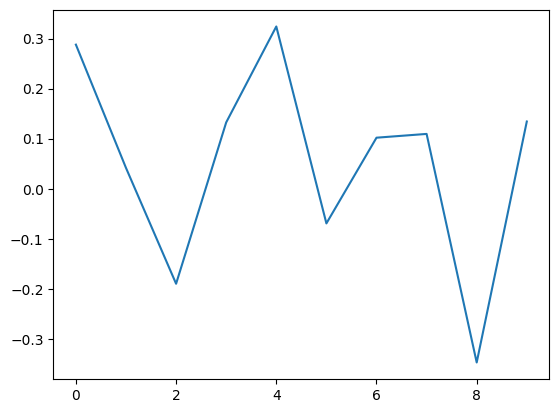

cancel_ask -> limit_bid


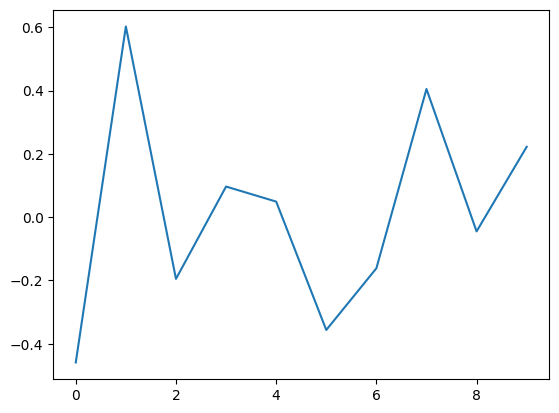

market_bid -> limit_bid


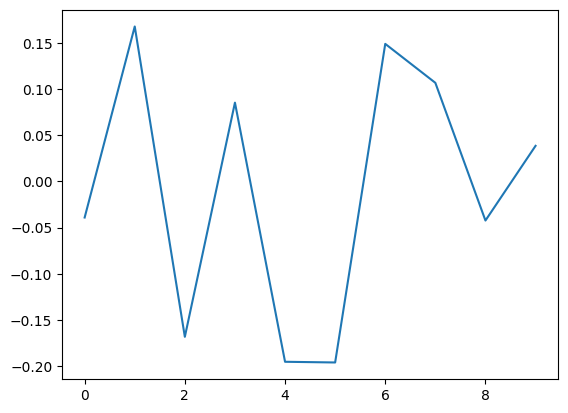

market_ask -> limit_bid


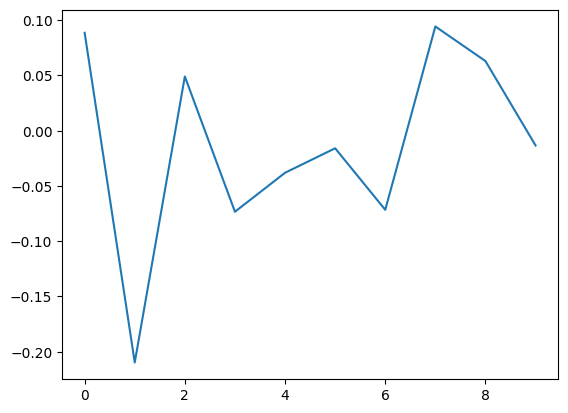

limit_ask
exogenous intensity : 40.83977198276882
limit_bid -> limit_ask


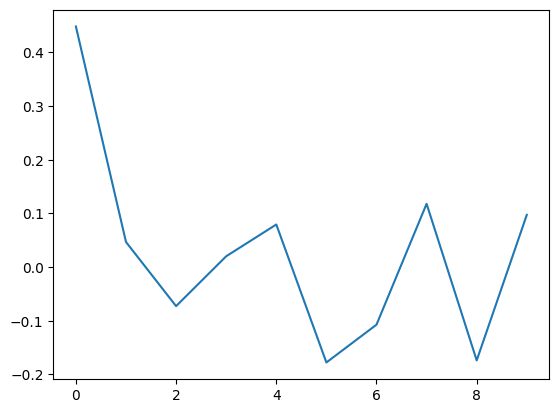

limit_ask -> limit_ask


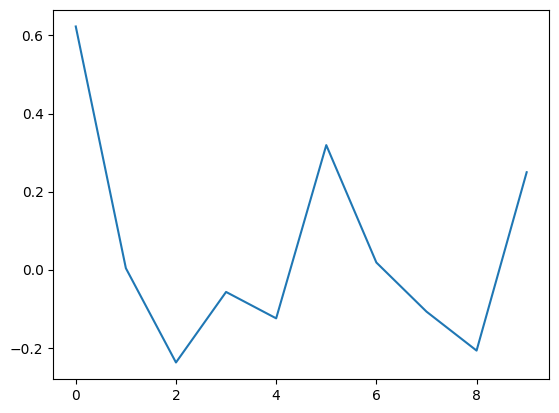

cancel_bid -> limit_ask


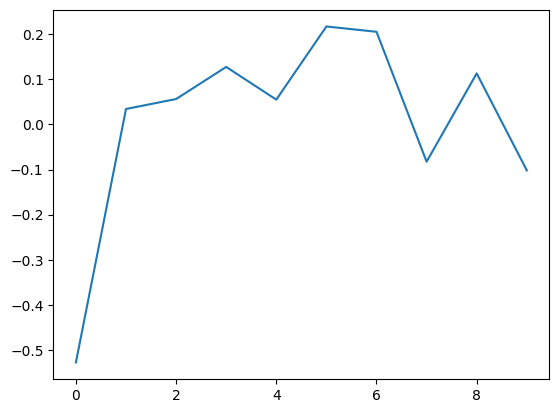

cancel_ask -> limit_ask


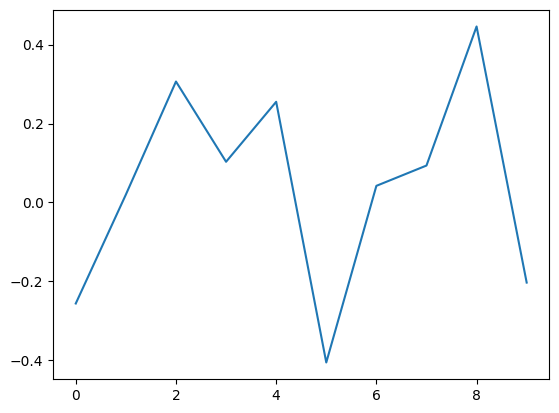

market_bid -> limit_ask


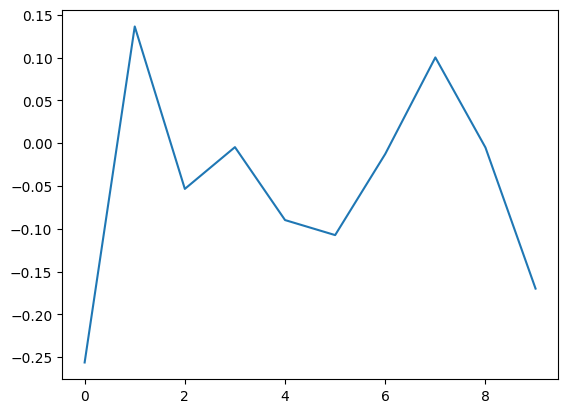

market_ask -> limit_ask


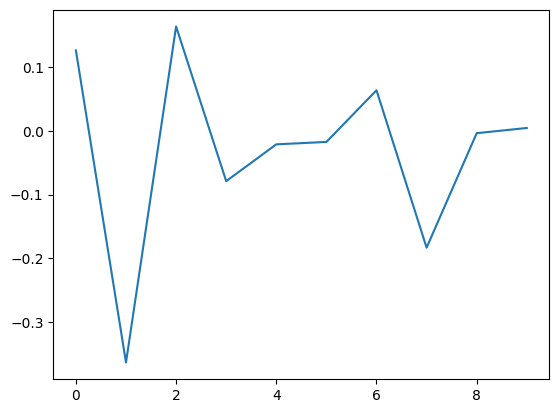

cancel_bid
exogenous intensity : 22.31367386579619
limit_bid -> cancel_bid


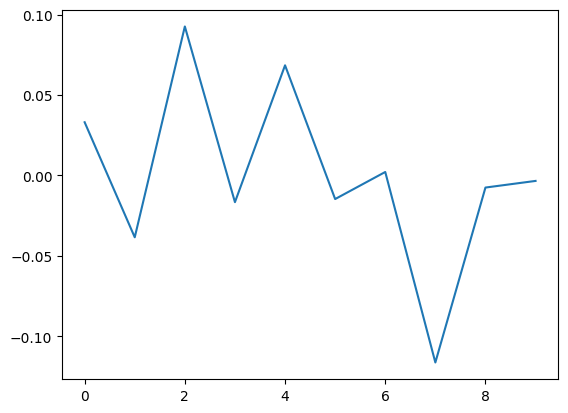

limit_ask -> cancel_bid


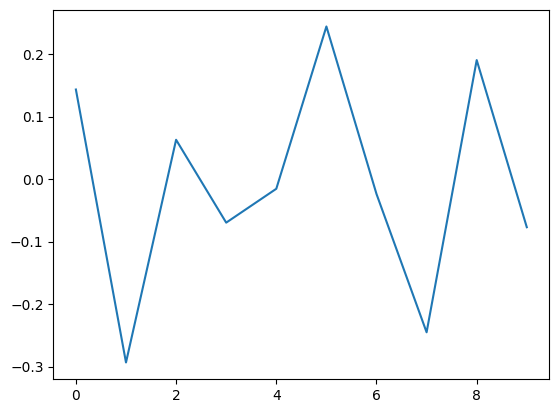

cancel_bid -> cancel_bid


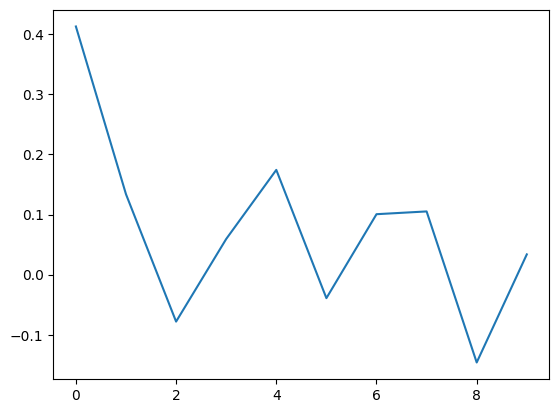

cancel_ask -> cancel_bid


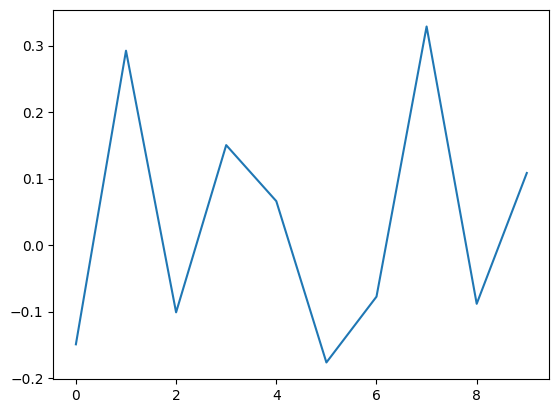

market_bid -> cancel_bid


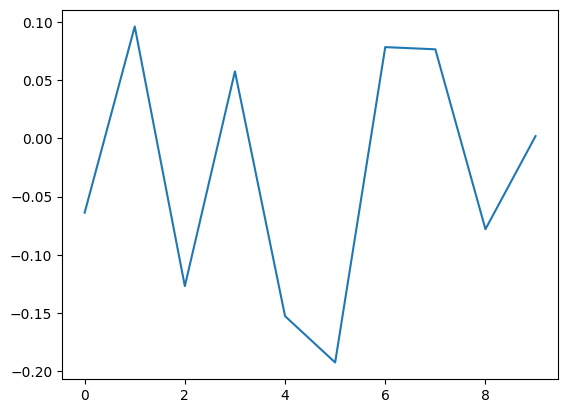

market_ask -> cancel_bid


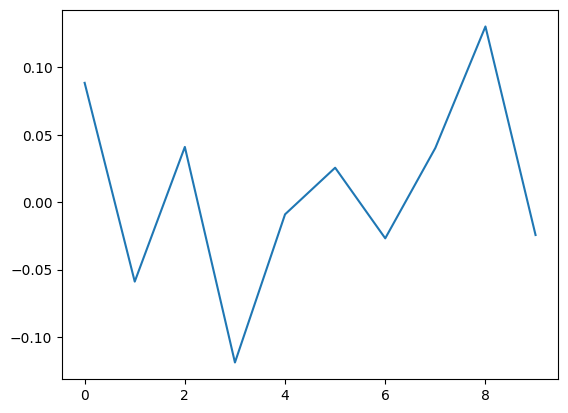

cancel_ask
exogenous intensity : 28.229246315717774
limit_bid -> cancel_ask


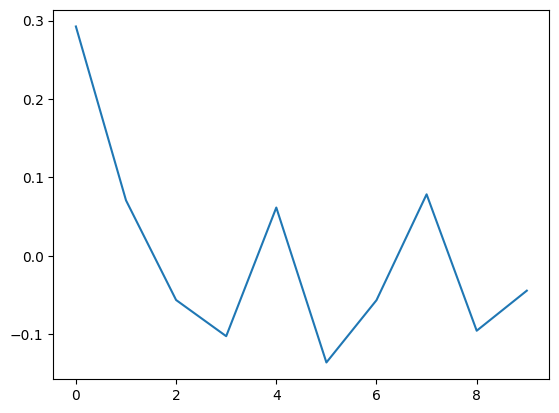

limit_ask -> cancel_ask


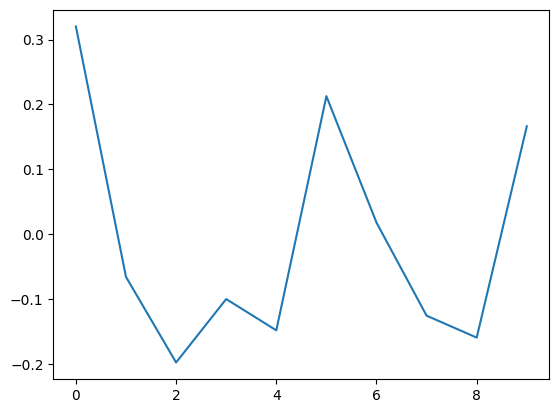

cancel_bid -> cancel_ask


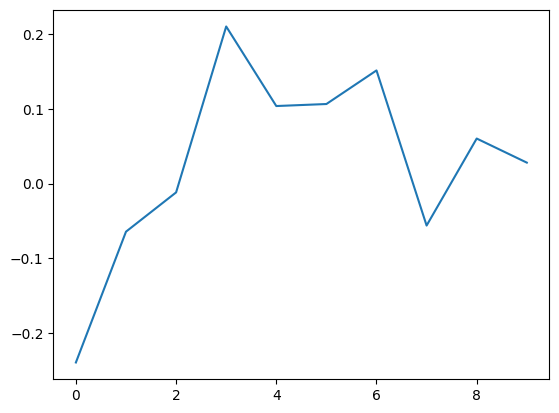

cancel_ask -> cancel_ask


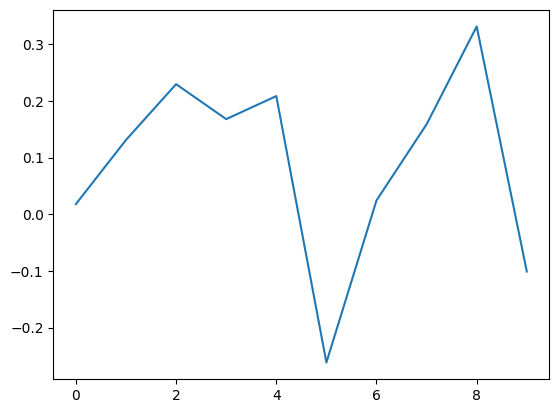

market_bid -> cancel_ask


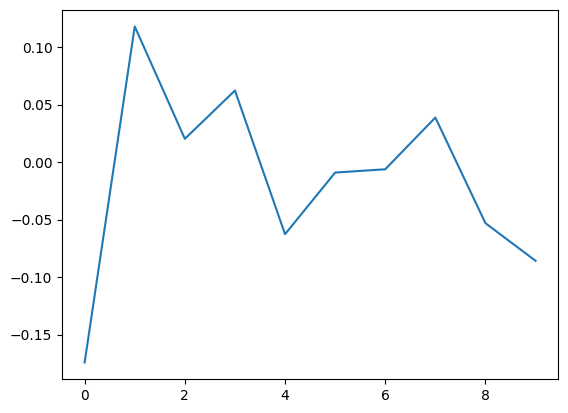

market_ask -> cancel_ask


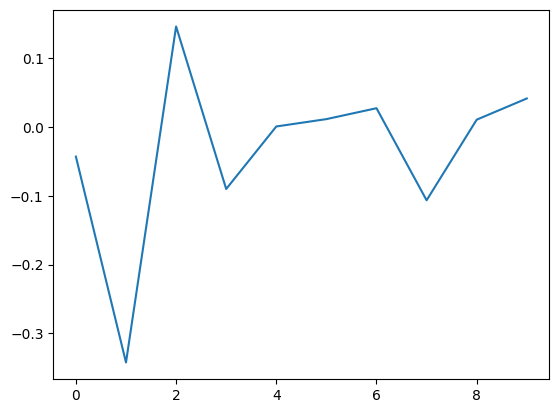

market_bid
exogenous intensity : 22.91447678885647
limit_bid -> market_bid


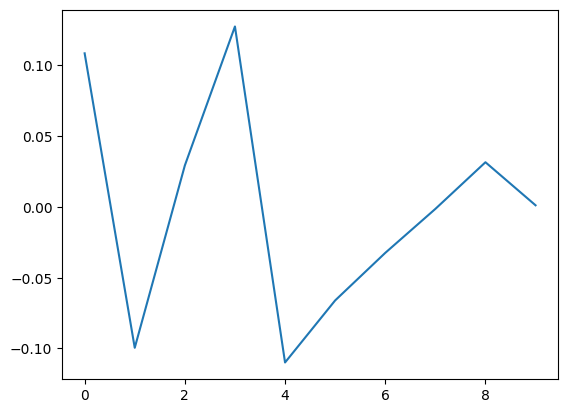

limit_ask -> market_bid


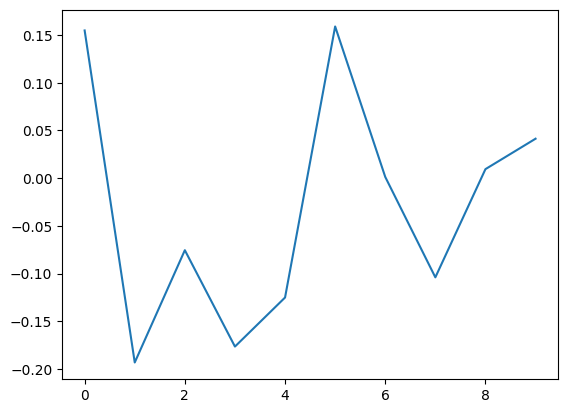

cancel_bid -> market_bid


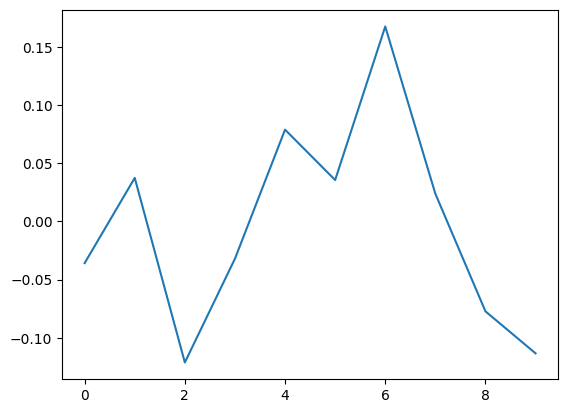

cancel_ask -> market_bid


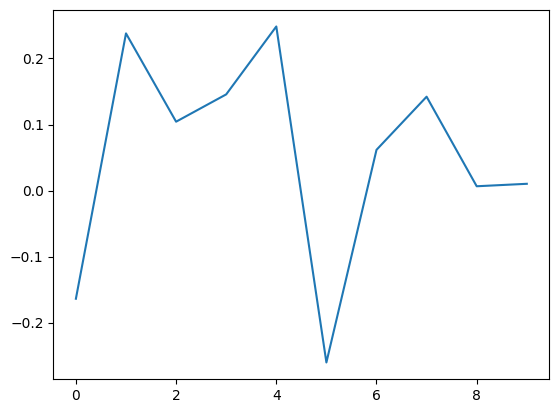

market_bid -> market_bid


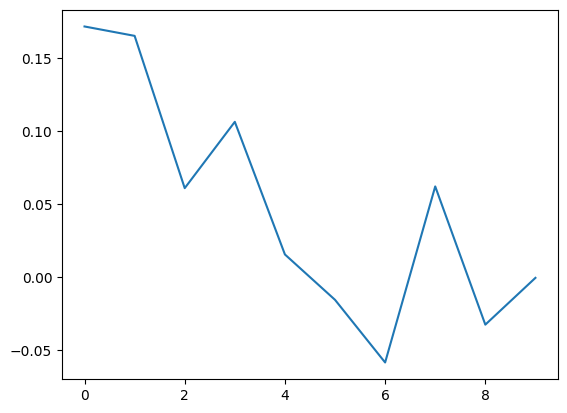

market_ask -> market_bid


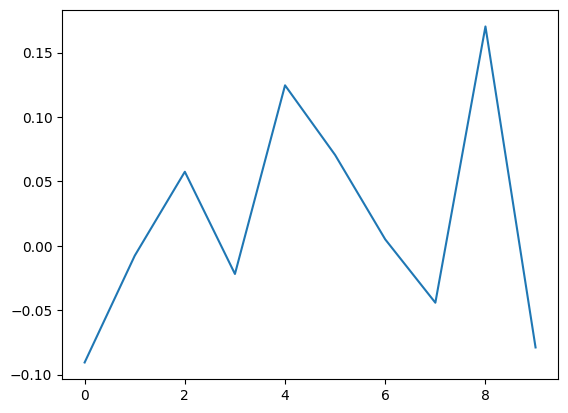

market_ask
exogenous intensity : 16.738667197373893
limit_bid -> market_ask


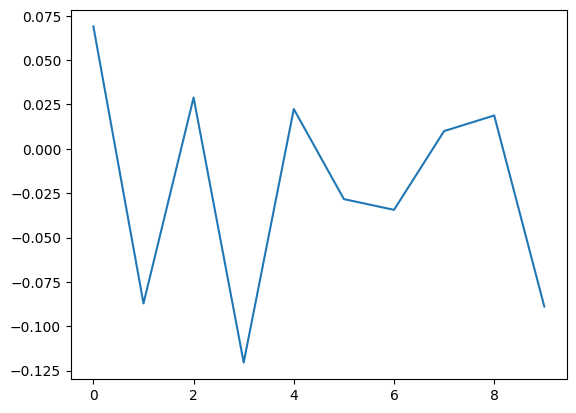

limit_ask -> market_ask


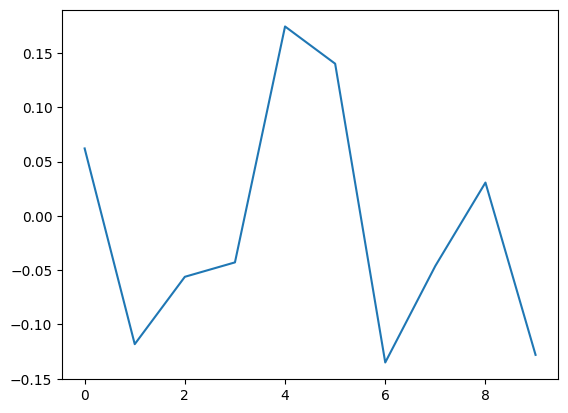

cancel_bid -> market_ask


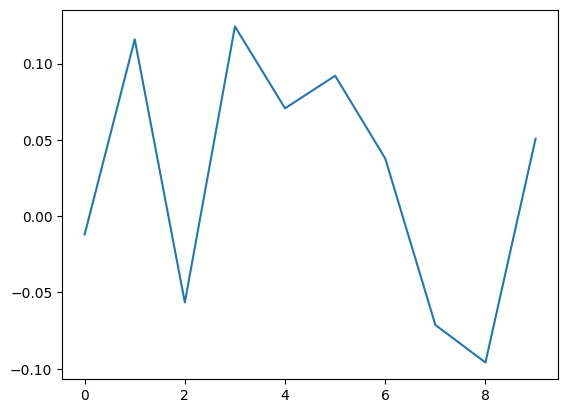

cancel_ask -> market_ask


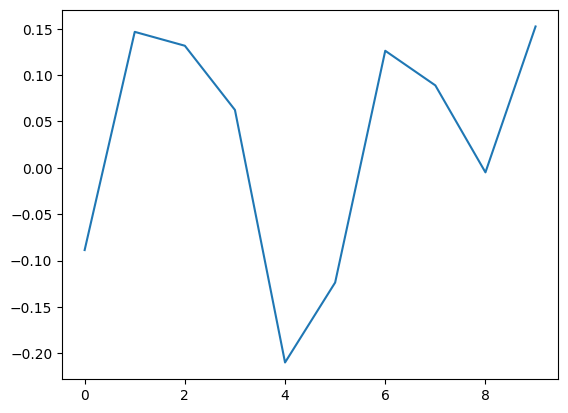

market_bid -> market_ask


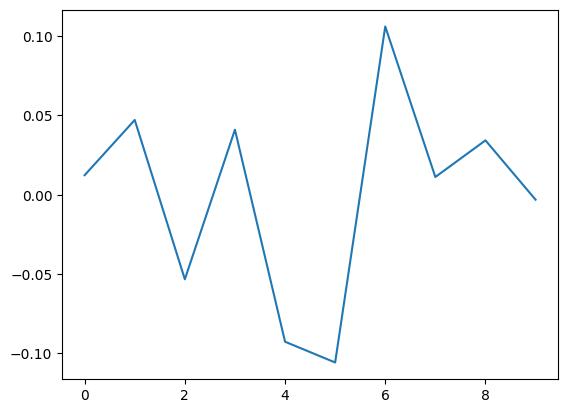

market_ask -> market_ask


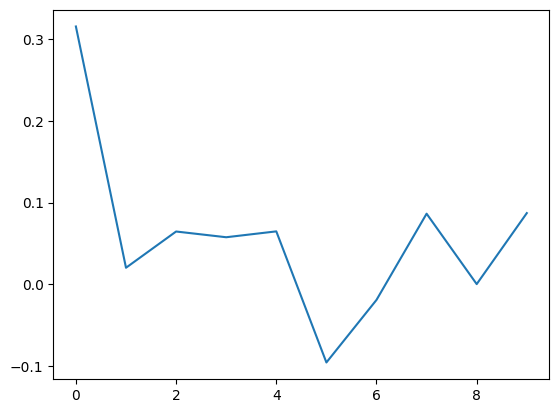

In [54]:
key = '2019-01-07_0'
for i in range(thetas[key].shape[0]):
    print(dims[i])
    print("exogenous intensity : " + str(thetas[key][i][-1]))
    for j in range(thetas[key].shape[0]):
        print(dims[j] + " -> " + dims[i])
        iter = j +  thetas[key].shape[0] * np.arange((thetas[key].shape[1] - 1 )//thetas[key].shape[0])
        plt.figure()
        plt.plot(thetas[key][i][iter])
        plt.show()

## 1 second bin size, lookback history (p) = 10 min = 600, fit window size (n) = 6.5 hr = len(df)  

In [ ]:
data_1 = l.loadBinned(binLength = 1, filterTop = True)

In [59]:
cls = fit.ConditionalLeastSquares(data_1, 600, 1, T = len(data_1['2019-01-07']['limit_bid']))
thetas_1 = cls.fit()

D:\Work\PhD\Expt 1\lobSimulations\hawkes\dataLoader.py:69: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  theMessageBook = pd.read_csv(theMessageBookFileName,
D:\Work\PhD\Expt 1\lobSimulations\hawkes\dataLoader.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000
D:\Work\PhD\Expt 1\lobSimulations\hawkes\dataLoader.py:129: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  binL = l.groupby("bin

limit_bid
exogenous intensity : -0.11650875556545592
limit_bid -> limit_bid


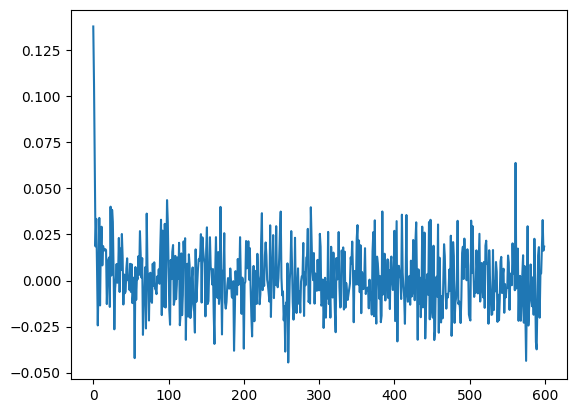

limit_ask -> limit_bid


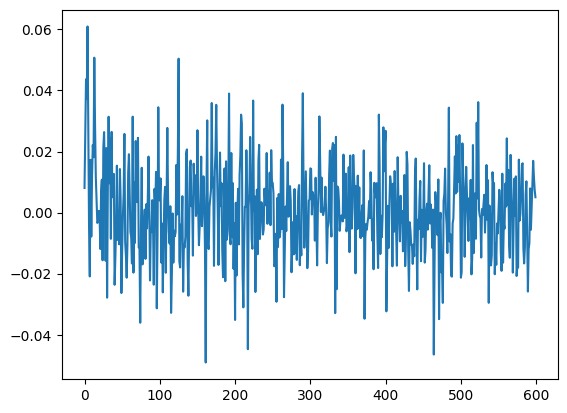

cancel_bid -> limit_bid


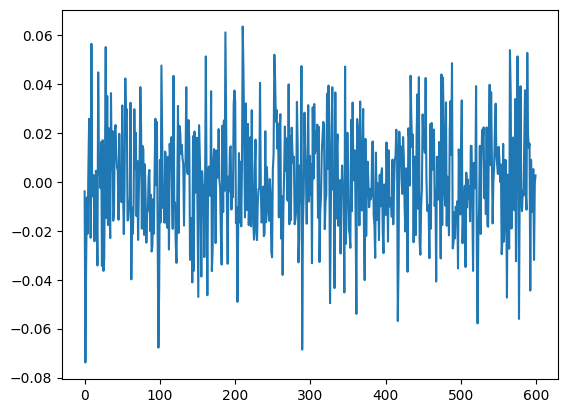

cancel_ask -> limit_bid


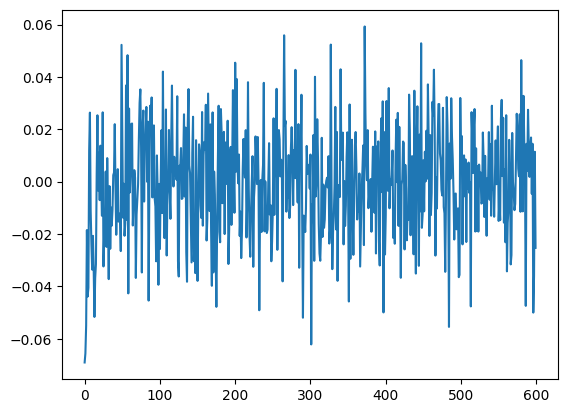

market_bid -> limit_bid


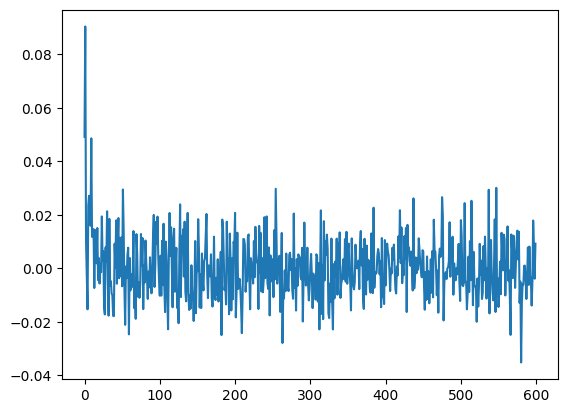

market_ask -> limit_bid


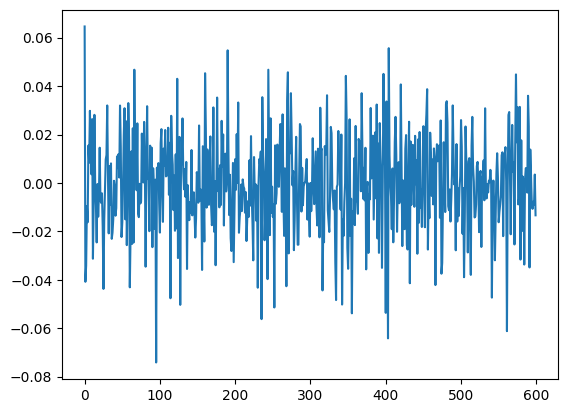

limit_ask
exogenous intensity : 0.1627259977704919
limit_bid -> limit_ask


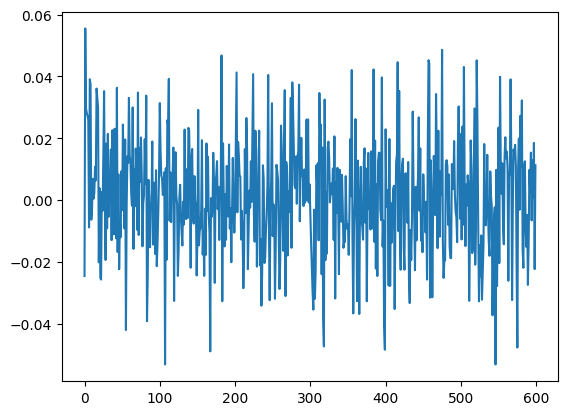

limit_ask -> limit_ask


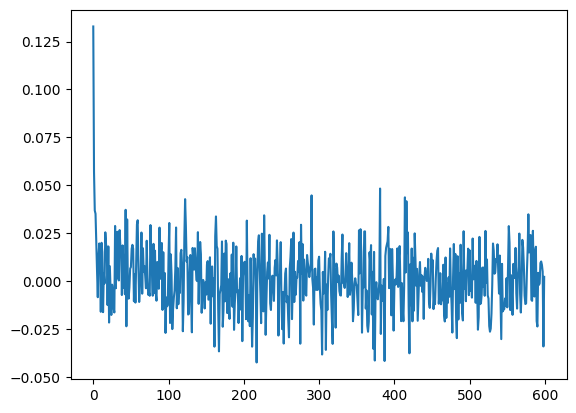

cancel_bid -> limit_ask


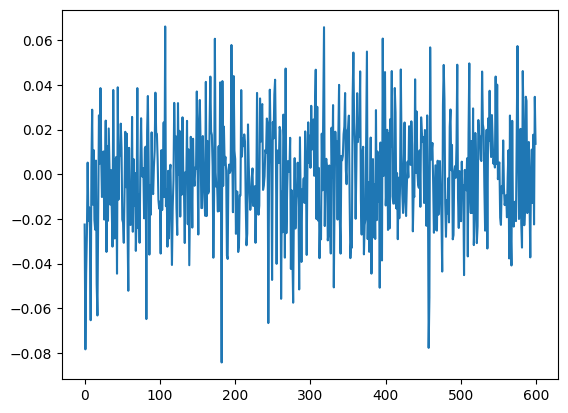

cancel_ask -> limit_ask


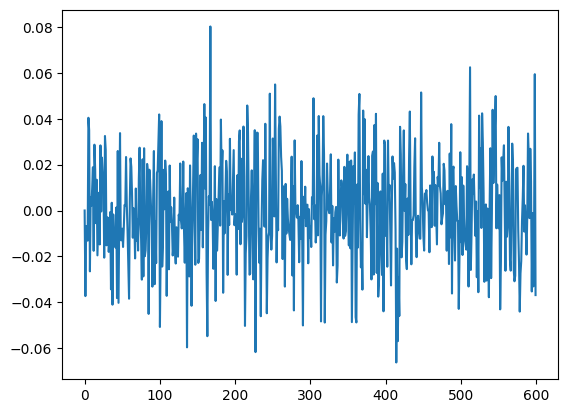

market_bid -> limit_ask


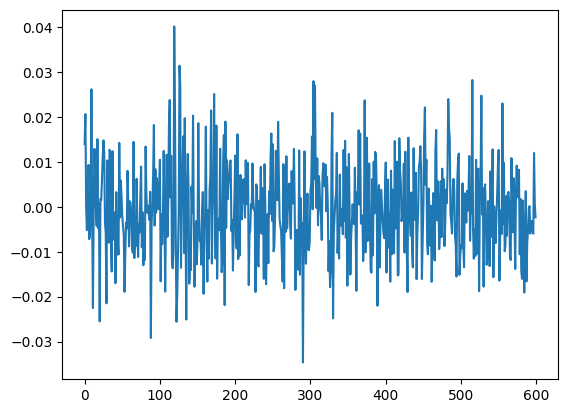

market_ask -> limit_ask


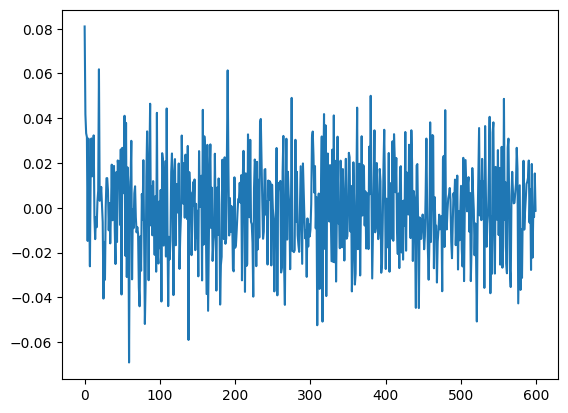

cancel_bid
exogenous intensity : 0.019860109085081068
limit_bid -> cancel_bid


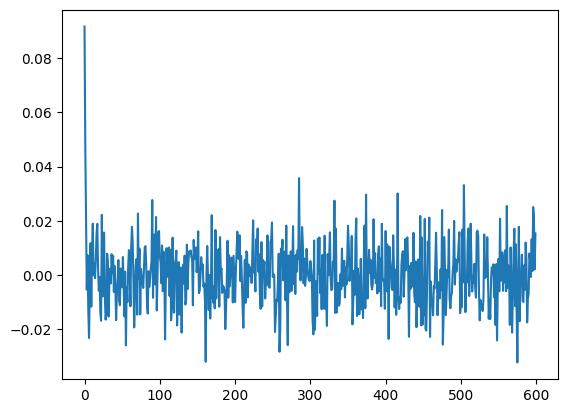

limit_ask -> cancel_bid


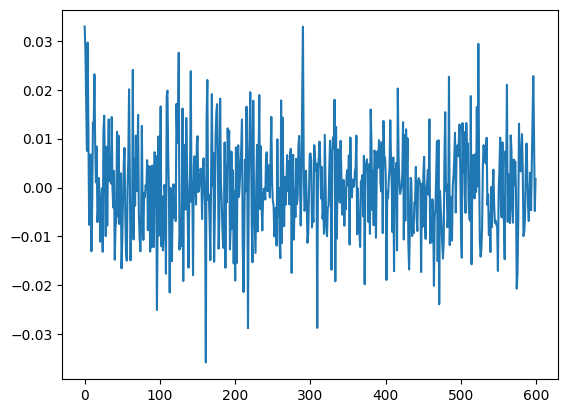

cancel_bid -> cancel_bid


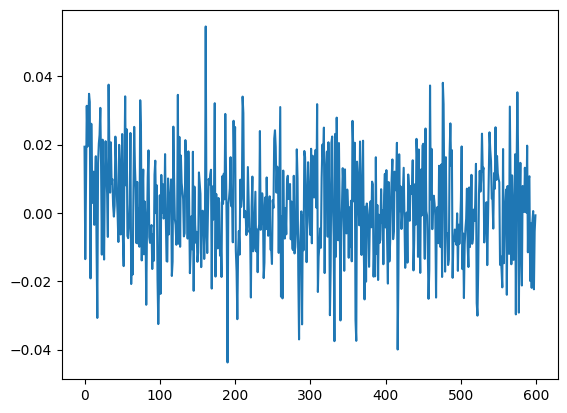

cancel_ask -> cancel_bid


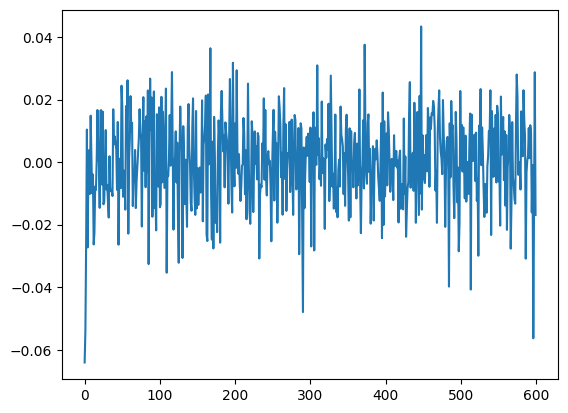

market_bid -> cancel_bid


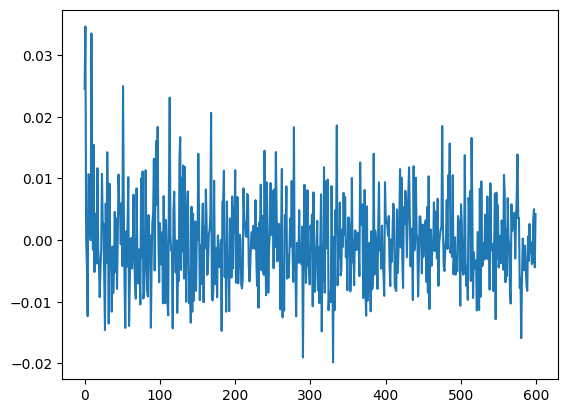

market_ask -> cancel_bid


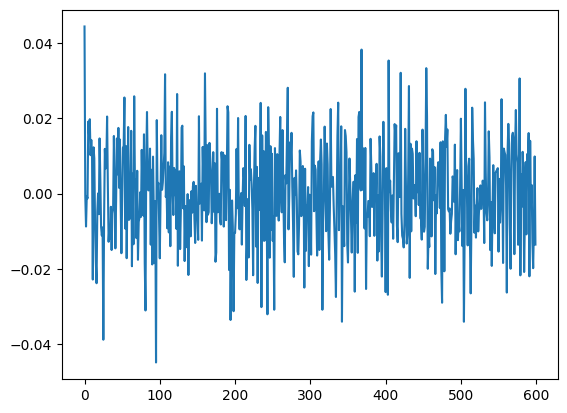

cancel_ask
exogenous intensity : 0.14324612062821007
limit_bid -> cancel_ask


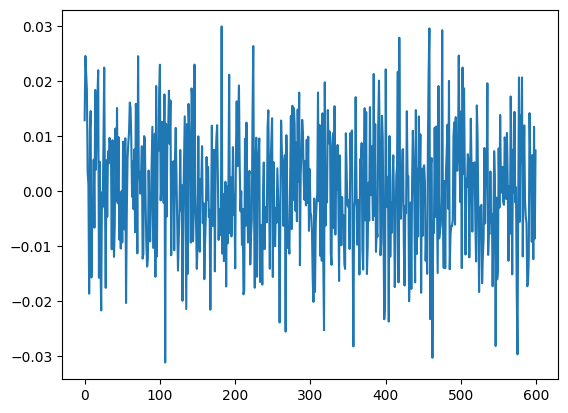

limit_ask -> cancel_ask


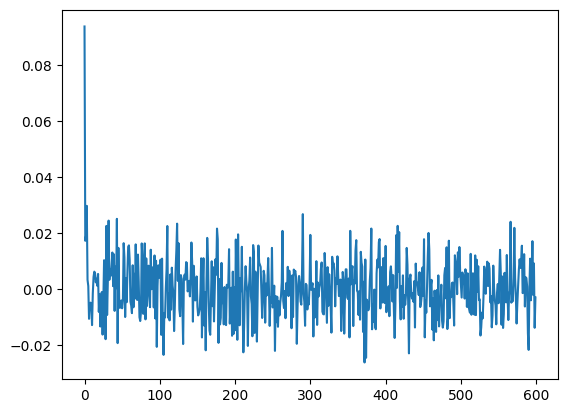

cancel_bid -> cancel_ask


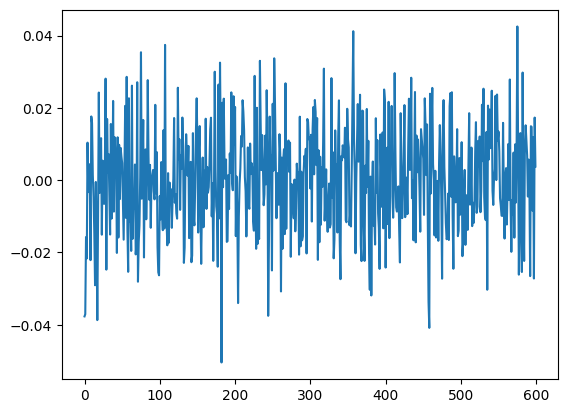

cancel_ask -> cancel_ask


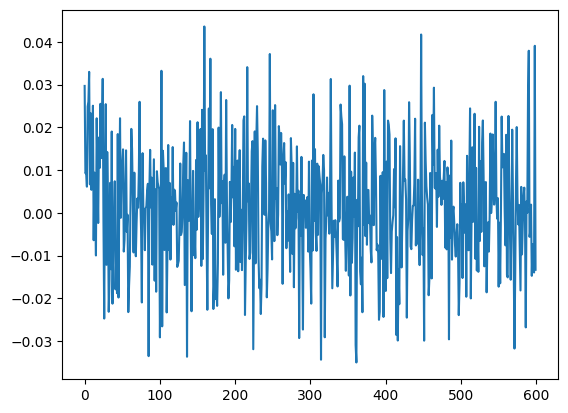

market_bid -> cancel_ask


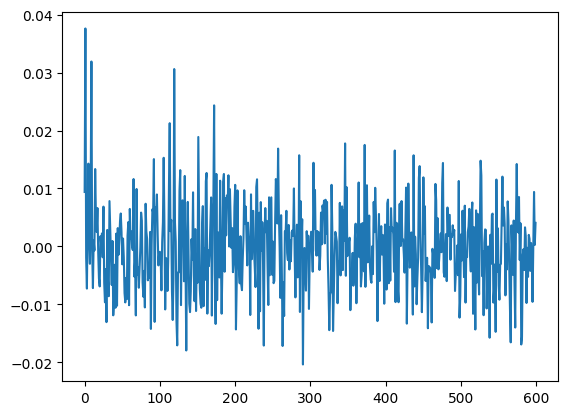

market_ask -> cancel_ask


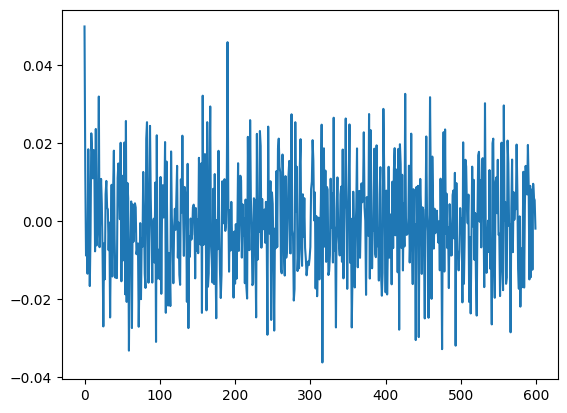

market_bid
exogenous intensity : 0.054019092163643145
limit_bid -> market_bid


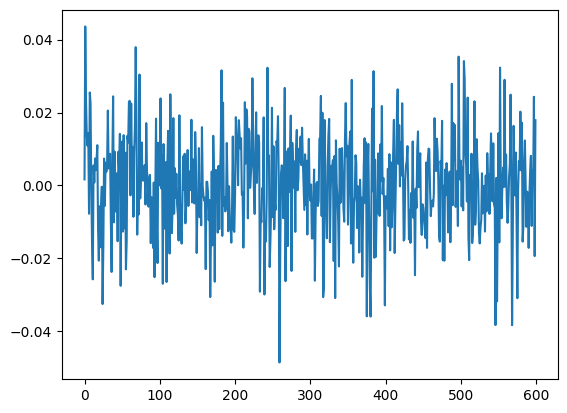

limit_ask -> market_bid


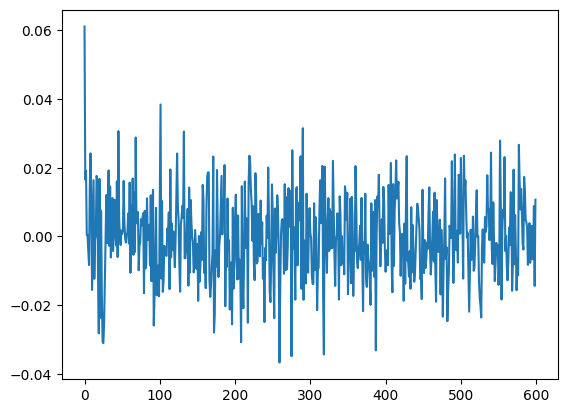

cancel_bid -> market_bid


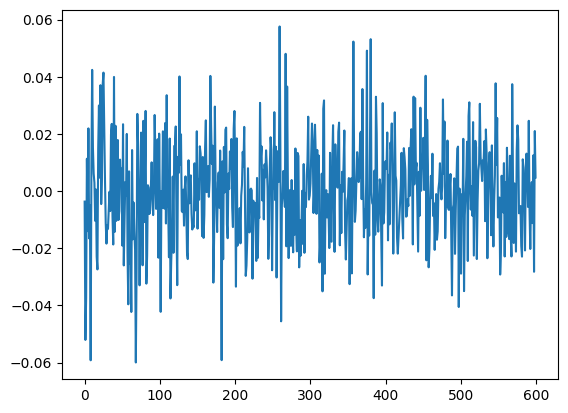

cancel_ask -> market_bid


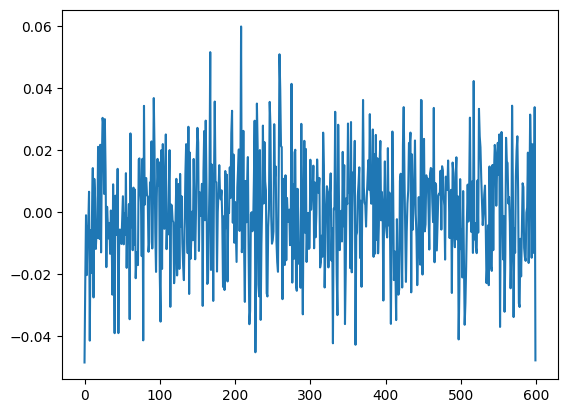

market_bid -> market_bid


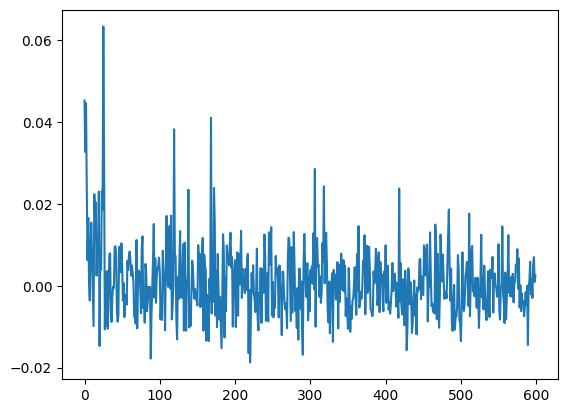

market_ask -> market_bid


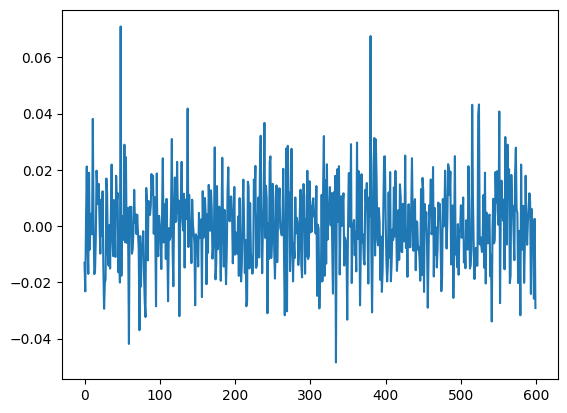

market_ask
exogenous intensity : 0.008873566971241809
limit_bid -> market_ask


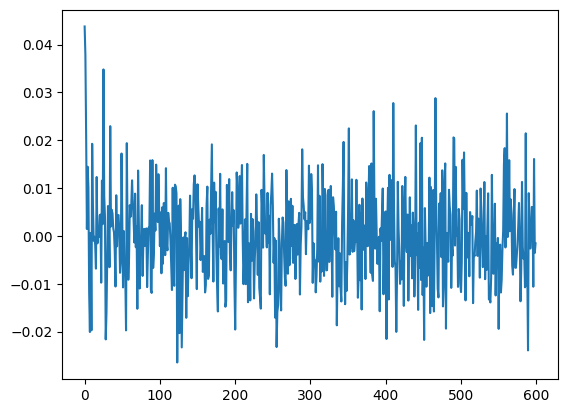

limit_ask -> market_ask


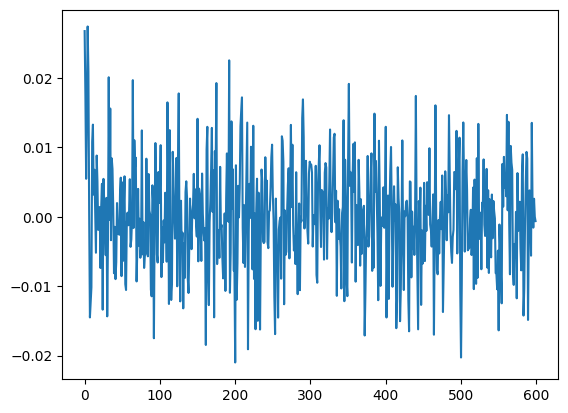

cancel_bid -> market_ask


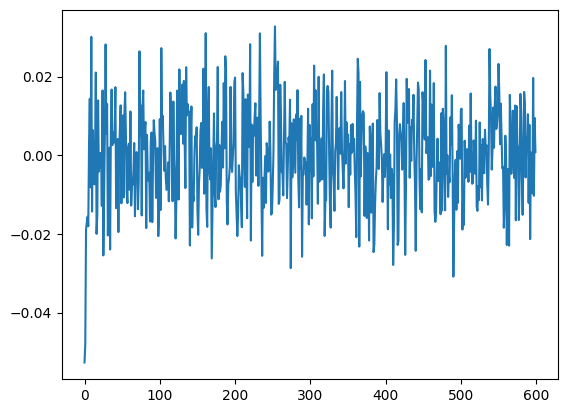

cancel_ask -> market_ask


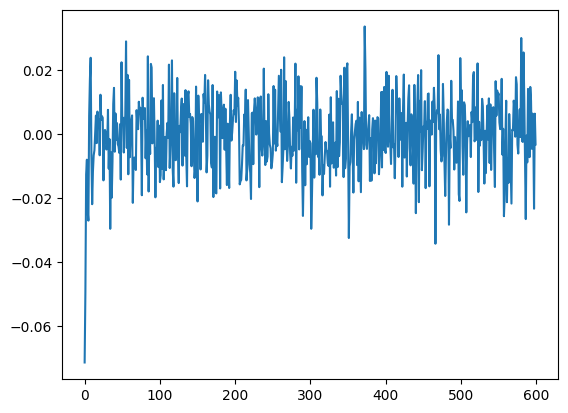

market_bid -> market_ask


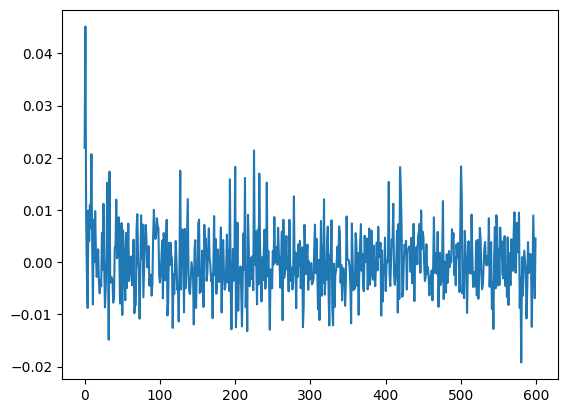

market_ask -> market_ask


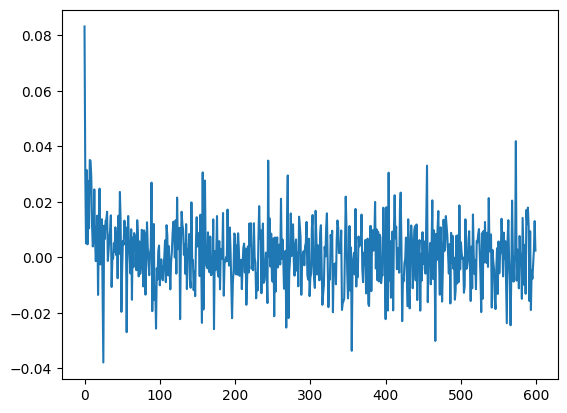

In [60]:
key = '2019-01-07_0'
for i in range(thetas_1[key].shape[0]):
    print(dims[i])
    print("exogenous intensity : " + str(thetas_1[key][i][-1]))
    for j in range(thetas_1[key].shape[0]):
        print(dims[j] + " -> " + dims[i])
        iter = j +  thetas_1[key].shape[0] * np.arange((thetas_1[key].shape[1] - 1 )//thetas_1[key].shape[0])
        plt.figure()
        plt.plot(thetas_1[key][i][iter])
        plt.show()

## 0.1 second bin size, lookback history (p) = 10 min = 6000, fit window size (n) = 6.5 hr = len(df)//2 

In [4]:
data_01 = l.loadBinned(binLength = 0.1, filterTop = True)

D:\Work\PhD\Expt 1\lobSimulations\hawkes\dataLoader.py:69: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  theMessageBook = pd.read_csv(theMessageBookFileName,
D:\Work\PhD\Expt 1\lobSimulations\hawkes\dataLoader.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000
D:\Work\PhD\Expt 1\lobSimulations\hawkes\dataLoader.py:129: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  binL = l.groupby("bin

In [5]:
%timeit
cls = fit.ConditionalLeastSquares(data_01, 6000, 1, T = len(data_01['2019-01-07']['limit_bid'])//16)
thetas_1 = cls.fit()

MemoryError: Unable to allocate 9.66 GiB for an array with shape (36001, 36001) and data type float64

In [ ]:
key = '2019-01-07_0'
for i in range(thetas_1[key].shape[0]):
    print(dims[i])
    print("exogenous intensity : " + str(thetas_1[key][i][-1]))
    for j in range(thetas_1[key].shape[0]):
        print(dims[j] + " -> " + dims[i])
        iter = j +  thetas_1[key].shape[0] * np.arange((thetas_1[key].shape[1] - 1 )//thetas_1[key].shape[0])
        plt.figure()
        plt.plot(thetas_1[key][i][iter])
        plt.show()

# statsmodel instead

In [3]:
data_1 = l.loadBinned(binLength = 1, filterTop = True)

D:\Work\PhD\Expt 1\lobSimulations\hawkes\dataLoader.py:69: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  theMessageBook = pd.read_csv(theMessageBookFileName,
D:\Work\PhD\Expt 1\lobSimulations\hawkes\dataLoader.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theOrderBookFiltered[theOrderBookFiltered.columns[i]]  = theOrderBookFiltered[theOrderBookFiltered.columns[i]]/10000
D:\Work\PhD\Expt 1\lobSimulations\hawkes\dataLoader.py:129: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  binL = l.groupby("bin

In [10]:
l_df = []
for i in data_1['2019-01-07'].keys():
    df  = data_1['2019-01-07'][i]
    l_df += [df.rename(columns = {'count' : i})[i]]
bigDf = pd.concat(l_df, axis= 1)

In [11]:
bigDf

,limit_bid,limit_ask,cancel_bid,cancel_ask,market_bid,market_ask
0,64,47,27,17,49,56
1,63,19,25,16,51,18
2,1,10,11,3,46,5
3,12,12,3,5,20,8
4,14,11,3,5,41,9
...,...,...,...,...,...,...
23394,73,51,22,29,16,37
23395,27,18,17,5,5,10
23396,20,26,18,5,4,8
23397,37,44,17,9,15,11


In [24]:
from statsmodels.tsa.api import VAR

In [25]:
model = VAR(bigDf)
res = model.fit(10)
res.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 06, Nov, 2023
Time:                     16:49:44
--------------------------------------------------------------------
No. of Equations:         6.00000    BIC:                    16.4892
Nobs:                     23389.0    HQIC:                   16.4040
Log likelihood:          -390117.    FPE:                1.27758e+07
AIC:                      16.3631    Det(Omega_mle):     1.25777e+07
--------------------------------------------------------------------
Results for equation limit_bid
                    coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------
const                  1.784905         0.093467           19.097           0.000
L1.limit_bid           0.165100         0.013628           12.115           0.000
L1.limit_ask           0.031653         0.012328    

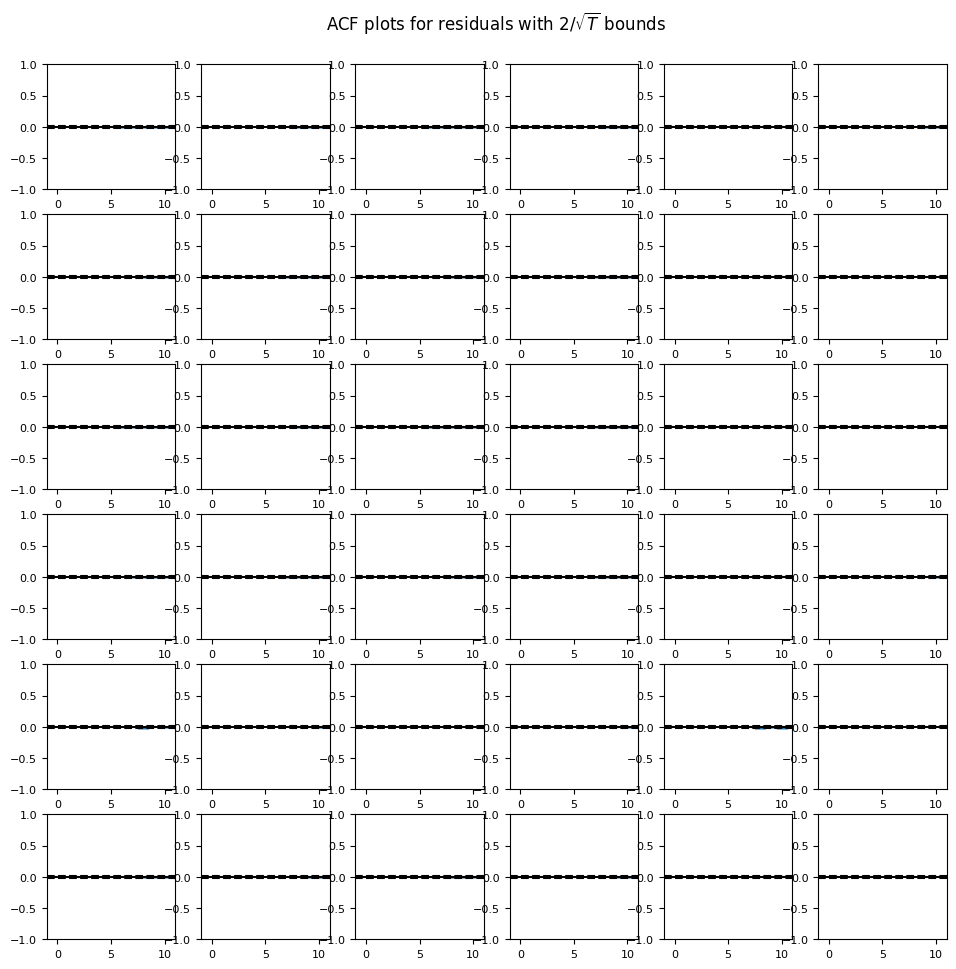

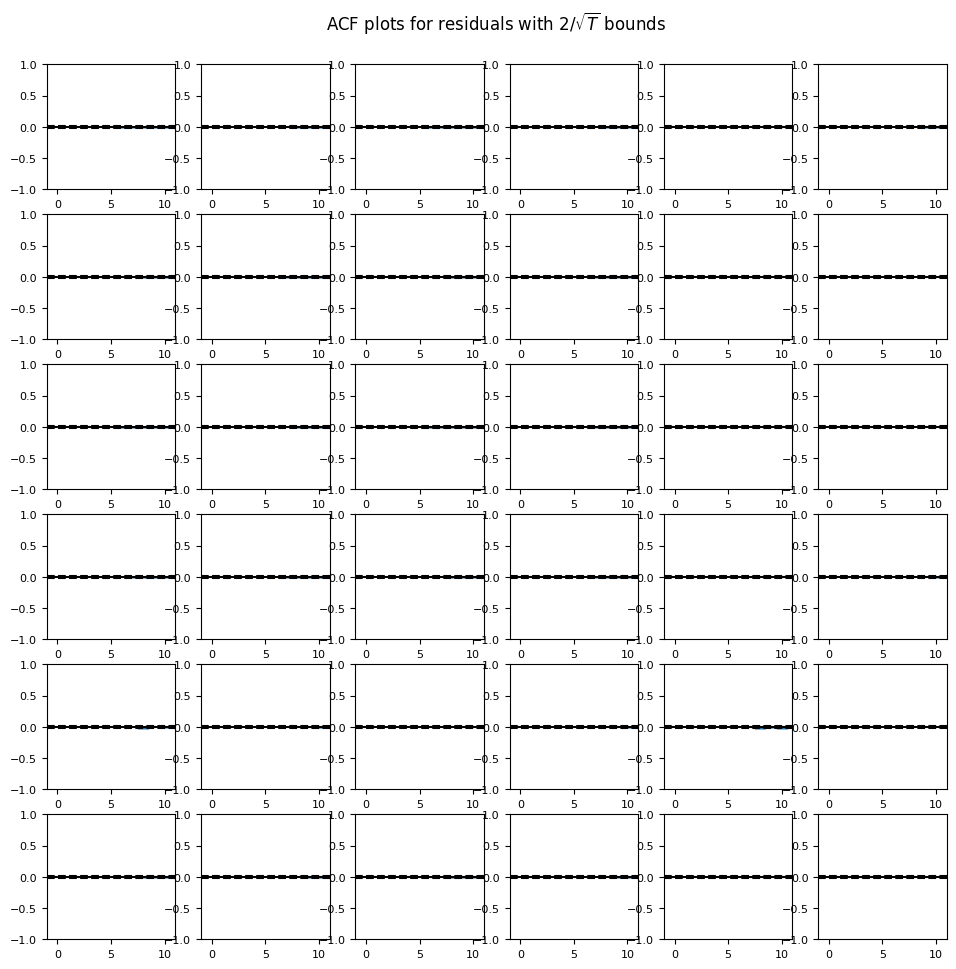

In [27]:
res.plot_acorr()

In [3]:
import numpy as np
a = np.array([np.array([1,2,3]),np.array([1,2,3])])

In [6]:
a[:,0]

array([1, 1])